In [53]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType, DoubleTensorType
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np

## Load Mnist dataset with 28x28 grayscale images

In [54]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = list(map(int, y))

initial_types = [('input', FloatTensorType([1, X.shape[1]]))]

## Show a MNIST digit with "byte" info

<AxesSubplot:>

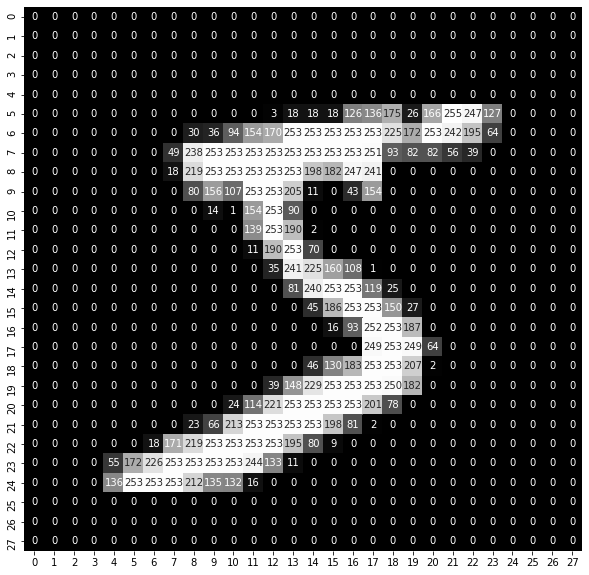

In [55]:
first_digit = X[0].reshape(28,28)
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(first_digit),annot=True,fmt=".0f", cmap="gray",cbar=False)

## Decide how many "PRINCIPALS" to use for reducing dimensionality, and thus, filesizes

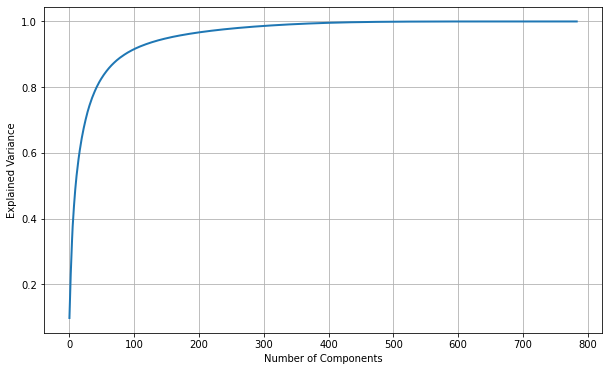

In [56]:
pca = PCA()
pca.n_components = 784

### Numpy 1.19.5 produces non-convergance random error on first pass, so retry if necessary ###
while True: 
    try: 
        pca_data = pca.fit_transform(X=X) 
        break 
    except: 
        continue

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(10, 6))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

## LogisticRegression

In [57]:
MnistModelLR = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca',PCA(n_components=200)),
                             ('lr',LogisticRegression(C=0.1,max_iter=200))]).fit(X, y)
crossval = cross_val_score(MnistModelLR, X,y)
print("Cross Validation:",crossval)
print("Score:",crossval.mean())

Cross Validation: [0.9205     0.92242857 0.91728571 0.91814286 0.93107143]
Score: 0.9218857142857143


In [58]:
onx = convert_sklearn(MnistModelLR, initial_types=initial_types)
with open("MnistLR.onnx", "wb") as file:
    file.write(onx.SerializeToString())

In [59]:
with open('MnistLR.pkl', 'wb') as file:
    pickle.dump(MnistModelLR, file)

## KNeighborsClassifier

In [60]:
MnistModelKNN = Pipeline(steps=[('scaler',StandardScaler()),
                             ('pca',PCA(n_components=150)),
                             ('knn',KNeighborsClassifier(n_neighbors=5))]).fit(X, y)

crossval = cross_val_score(MnistModelKNN, X,y)
print("Cross Validation:",crossval)
print("Score:",crossval.mean())

Cross Validation: [0.957      0.95821429 0.95678571 0.95492857 0.95985714]
Score: 0.9573571428571428


In [61]:
onx = convert_sklearn(MnistModelKNN, initial_types=initial_types)
with open("MnistKNN.onnx", "wb") as file:
    file.write(onx.SerializeToString())

In [62]:
with open('MnistKNN.pkl', 'wb') as file:
    pickle.dump(MnistModelKNN, file)

## RandomForestClassifier

In [63]:
MnistModelRF = Pipeline(steps=[('scaler',MinMaxScaler()),
                             ('pca',PCA(n_components=200)),
                             ('rt',RandomForestClassifier(n_estimators=150))]).fit(X, y)
crossval = cross_val_score(MnistModelRF, X,y)
print("Cross Validation:",crossval)
print("Score:",crossval.mean())                             

Cross Validation: [0.95464286 0.95157143 0.95192857 0.94885714 0.95814286]
Score: 0.9530285714285714


In [64]:
onx = convert_sklearn(MnistModelRF, initial_types=initial_types)
with open("MnistRF.onnx", "wb") as file:
    file.write(onx.SerializeToString())


In [65]:
with open('MnistRF.pkl', 'wb') as file:
    pickle.dump(MnistModelRF, file)

## ExtraTreesClassifier

In [66]:
MnistModelET = Pipeline(steps=[('scaler',MinMaxScaler()),
                             ('pca',PCA(n_components=200)),
                             ('et',ExtraTreesClassifier(n_estimators=200))]).fit(X, y)
crossval = cross_val_score(MnistModelET, X,y)
print("Cross Validation:",crossval)
print("Score:",crossval.mean())

Cross Validation: [0.96192857 0.96114286 0.96135714 0.96035714 0.96678571]
Score: 0.9623142857142858


In [67]:
onx = convert_sklearn(MnistModelET, initial_types=initial_types)
with open("MnistET.onnx", "wb") as file:
    file.write(onx.SerializeToString())

In [68]:
with open('MnistET.pkl', 'wb') as file:
    pickle.dump(MnistModelET, file)

## Pycaret model comparison

In [23]:
# from pycaret.classification import *
# ### Sampling ####
# X2=pd.DataFrame(X).sample(n=7000, random_state=1)
# y2=pd.DataFrame(y).sample(n=7000, random_state=1)
# X2['y']=y2
# CaretModel = setup(data = X2, target = 'y', silent=True)
# best = compare_models(exclude = ['catboost']) # CatBoost demora mucho

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9398,0.9958,0.9387,0.9413,0.9396,0.9330,0.9332,0.3400
lightgbm,Light Gradient Boosting Machine,0.9357,0.9964,0.9350,0.9369,0.9357,0.9285,0.9286,6.6920
rf,Random Forest Classifier,0.9310,0.9951,0.9298,0.9323,0.9308,0.9233,0.9235,0.2980
xgboost,Extreme Gradient Boosting,0.9300,0.9959,0.9290,0.9309,0.9299,0.9222,0.9223,12.3240
knn,K Neighbors Classifier,0.9245,0.9871,0.9229,0.9283,0.9239,0.9160,0.9165,1.1370
gbc,Gradient Boosting Classifier,0.9071,0.9940,0.9059,0.9086,0.9070,0.8967,0.8969,17.4760
lr,Logistic Regression,0.8592,0.9811,0.8570,0.8607,0.8588,0.8434,0.8437,3.7480
svm,SVM - Linear Kernel,0.8457,0.0000,0.8432,0.8492,0.8448,0.8284,0.8290,0.6660
lda,Linear Discriminant Analysis,0.8277,0.9697,0.8267,0.8316,0.8273,0.8085,0.8090,0.3530
ridge,Ridge Classifier,0.8120,0.0000,0.8097,0.8128,0.8096,0.7909,0.7915,0.0490


In [24]:
# tuned = tune_model(LogisticRegression(C=1,max_iter=1000).fit(X, y),n_iter = 100)
# tuned

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8714,0.9842,0.8693,0.8711,0.8709,0.8570,0.8571
1,0.8633,0.9859,0.8617,0.8690,0.8641,0.8480,0.8485
2,0.8245,0.9720,0.8224,0.8266,0.8240,0.8048,0.8052
3,0.8490,0.9787,0.8447,0.8499,0.8480,0.8321,0.8324
4,0.8755,0.9841,0.8743,0.8775,0.8756,0.8616,0.8618
5,0.8469,0.9799,0.8444,0.8469,0.8465,0.8298,0.8299
6,0.8429,0.9794,0.8395,0.8431,0.8419,0.8253,0.8255
7,0.8694,0.9853,0.8671,0.8713,0.8696,0.8548,0.8550
8,0.8592,0.9792,0.8589,0.8614,0.8584,0.8435,0.8439
9,0.8937,0.9841,0.8921,0.8948,0.8929,0.8818,0.8820


LogisticRegression(C=0.189, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)